In [3]:
import pandas as pd
import numpy as np
from scipy import integrate
import seaborn as sns
import matplotlib.pyplot as mp
import plotly.offline as pyo
import plotly.graph_objs as go;
import pandas_datareader as datareader
import datetime as dt
import math
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')


#### Problem Statement 3
:You are provided with the medical cost dataset. You need to predict individual medical costs billed by health insurance

.Dataset Description:

I.age: age of the primary beneficiary

II.sex: gender of primary beneficiary female, male

III.bmi: Body mass index, providing an understanding of the body, weights that are relatively high or low relative to height, an objective index of body

IV.weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

V.children: Number of children covered by health insurance / Number of dependents

VI.smoker: Smokes or not

VII.region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

VIII.charges: Individual medical costs billed by health insurance


Write a Python code to perform the following tasks mentioned:


1.Load the data, check its shape and check for null values

2.Convert categorical features to numerical values (Use One-Hot Encoding)

3.Split the dataset for training and testing  

4.Train the model using sklearn –Linear Regression

5.Find the intercept and coefficient from the trained model 

6.Predict the prices of test data and evaluate the model using calculated r2 score and root mean squared error

In [11]:
data=pd.read_csv("D:\Shivam\study material\CSV\insurance.csv")
data.sample(10)


,age,sex,bmi,children,smoker,region,charges
153,42,female,23.370,0,yes,northeast,19964.74630
1298,33,male,27.455,2,no,northwest,5261.46945
617,49,male,25.600,2,yes,southwest,23306.54700
995,39,female,23.275,3,no,northeast,7986.47525
1063,36,male,28.595,3,no,northwest,6548.19505
409,32,male,30.030,1,no,southeast,4074.45370
113,21,female,35.720,0,no,northwest,2404.73380
536,33,female,38.900,3,no,southwest,5972.37800
1186,20,male,35.625,3,yes,northwest,37465.34375
216,53,female,26.600,0,no,northwest,10355.64100


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
data.describe(include="all") 

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Total 1338 rows with 7 column

In [16]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values

In [20]:
data.shape


(1338, 7)

In [28]:
encoded_data=pd.get_dummies(data,columns=['sex','smoker','region'],drop_first=True)


In [31]:
data=encoded_data

In [32]:
data

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [33]:
x=data.drop('charges',axis=1)
y=data['charges']

## Linera regression

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=40)

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [39]:
ypred=lr.predict(xtest)



In [49]:
lr.score(xtrain,ytrain),lr.score(xtest,ytest)

(0.7548625668706685, 0.7341854344194202)

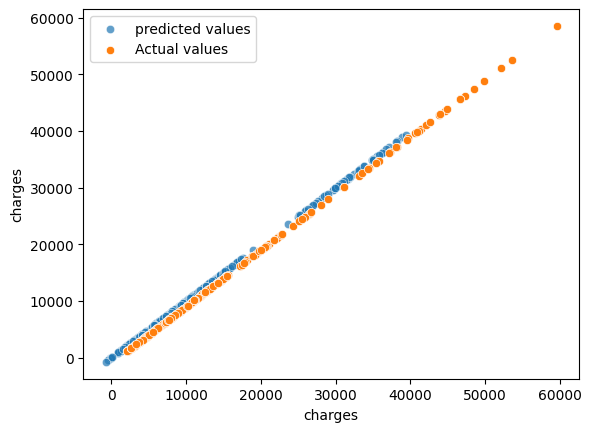

In [44]:
sns.scatterplot(x=ypred,y=ypred,label='predicted values',alpha=0.7)
sns.scatterplot(x=ytest+1000,y=ytest,label='Actual values')
mp.legend()
mp.show()


In [45]:
from sklearn.metrics  import r2_score,mean_absolute_error,mean_squared_error


In [47]:
print("R2 score",r2_score(ytest,ypred))
print("Mean squared error",mean_squared_error(ytest,ypred))


R2 score 0.7341854344194202
Mean squared error 39737837.0602452
